# Checking whether a point is within a contour

In this recipe, we will discover a way of checking whether a point is inside of a contour, or if it belongs to the contour's border.

There is a special function in OpenCV to measure the smallest distance from a point to a contour. It's called `cv2.pointPolygonTest`. It takes three arguments, and returns the measured distance. The arguments are a contour, a point, and a Boolean flag, whose purpose we will discuss a little later. The resulting distance can be positive, negative, or equal to zero, which corresponds to inside the contour, outside the contour, or on a contour point position. The last Boolean argument determines whether our function returns the exact distance or only an indicator with a value (`+1; 0; -1`). The sign of the indicator has the same meaning as the mode that computes the exact distance.

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

%matplotlib auto
%pylab inline


def print_image(header,name,np_arr,start_First=0, end_First=1, start_Second=0, end_Second=2):
    print("------  {0:-<25}    Shape{1} {2}: {3:}".format(header, np_arr.shape, name, str(np_arr.dtype)) )
    shapes = np_arr.shape #print(shapes)
    if shapes[0] < end_First:
        end_First = shapes[0]
    if shapes[1] < end_Second:
        end_Second = shapes[1]
    if len(shapes)==3:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
    if len(shapes)==2:
        for i in range (start_First,end_First):
            print("[", end=" ")
            for k in range (start_Second,end_Second):
                print(np_arr[i,k], end=" ")
            print(']')
def plt_view_image(plt,list_images,figsize=(15,6), axis="off", cmap='gray'):
    #%pylab inline
    plt.figure(figsize=figsize)
    n = len(list_images)  #; print(n)
    plot_number = 1
    for name, img in list_images:
        plt.subplot(1,n,plot_number)
        plt.axis(axis)
        plt.title(name)
        if cmap =='gray':
            plt.imshow(img,cmap='gray' )
        else:
            plt.imshow(img )
        plot_number = plot_number + 1
    plt.show()
#help("modules")   
import sys             
print('\n'.join(sys.path))
#pip list"

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib
D:\HTML_DOC\Program\opencv\Packt\S03\env
C:\Program Files\Python38\python38.zip
C:\Program Files\Python38\DLLs
C:\Program Files\Python38\lib
C:\Program Files\Python38
d:\html_doc\program\opencv\packt\s03\env

d:\html_doc\program\opencv\packt\s03\env\lib\site-packages
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\pip-20.0.2-py3.8.egg
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\win32\lib
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\Pythonwin
d:\html_doc\program\opencv\packt\s03\env\lib\site-packages\IPython\extensions
C:\Users\polit\.ipython


------  Original-----------------    Shape(512, 512) image: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]


<Figure size 720x432 with 0 Axes>

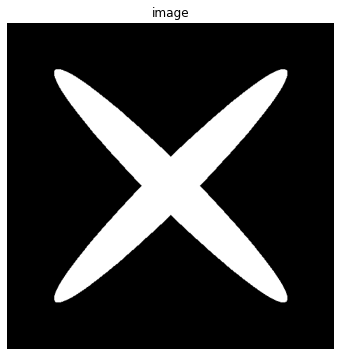

In [2]:
image = cv2.imread('data/bw.png', cv2.IMREAD_GRAYSCALE)

print_image('Original','image',image,0,2,0,15)
#%pylab inline
plt.figure(figsize=(10,6))
plt_view_image(plt,[["image",image]   ])

In [3]:
#https://robotclass.ru/tutorials/opencv-python-find-contours/
#Функция OpenCV для поиска контуров findContours() 
#findContours( кадр, режим_группировки, метод_упаковки [, контуры[, иерархия[, сдвиг]]])
#  кадр - должным образом подготовленная для анализа картинка. Это должно быть 8-битное изображение. Поиск контуров 
#         использует для работы монохромное изображение, так что все пиксели картинки с ненулевым цветом будут 
#         интерпретироваться как 1, а все нулевые останутся нулями.
#  режим_группировки — один из четырех режимов группировки найденных контуров: 
#                      CV_RETR_LIST — выдаёт все контуры без группировки; 
#                      CV_RETR_EXTERNAL — выдаёт только крайние внешние контуры; 
#                      CV_RETR_CCOMP — группирует контуры в двухуровневую иерархию. 
#                                      На верхнем уровне — внешние контуры объекта. 
#                                      На втором уровне — контуры отверстий, если таковые имеются. 
#                                      Все остальные контуры попадают на верхний уровень; 
#                      CV_RETR_TREE — группирует контуры в многоуровневую иерархию.
#  метод_упаковки - один из трёх методов упаковки контуров: 
#                   CV_CHAIN_APPROX_NONE — упаковка отсутствует и все контуры хранятся в виде отрезков, состоящих из двух пикселей; 
#                   CV_CHAIN_APPROX_SIMPLE — склеивает все горизонтальные, вертикальные и диагональные контуры; 
#                   CV_CHAIN_APPROX_TC89_L1,CV_CHAIN_APPROX_TC89_KCOS — применяет к контурам метод упаковки (аппроксимации) Teh-Chin.
#  контуры — список всех найденных контуров, представленных в виде векторов; 
#  иерархия — информация о топологии контуров. 
#             Каждый элемент иерархии представляет собой сборку из четырех индексов, которая соответствует контуру[i]:
#  иерархия[i][0] — индекс следующего контура на текущем слое;
#             [i][1] — индекс предыдущего контура на текущем слое:
#                [i][2] — индекс первого контура на вложенном слое;
#                   [i][3] — индекс родительского контура.
#  сдвиг — величина смещения точек контура.

#По состоянию на 2019 год у нас есть три версии OpenCV (OpenCV2, OpenCV3 и OpenCV4).
#OpenCV4 и OpenCV2 имеют похожее поведение (возвращют два значения из cv2.findContours()). 
#Тогда как OpenCV3 возвращает три значения.
#im2, contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


contours, hierarchy = cv2.findContours(image, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)


for each in contours:
    print("shape =",each.shape)
    for i in range (0,10):
        if i<each.shape[0]:
            print(each[i],end="")
    print()
print("hierarchy",hierarchy)

#contours — список всех найденных контуров, представленных в виде векторов; 
#hierarchy — информация о топологии контуров. 
#Каждый элемент иерархии представляет собой сборку из четырех индексов, которая соответствует контуру[i]:
#hierarchy[i][0] — индекс следующего контура на текущем слое;
#            [i][1] — индекс предыдущего контура на текущем слое:
#               [i][2] — индекс первого контура на вложенном слое;
#                  [i][3] — индекс родительского контура.

print_image('contours[0]','contours[0]',contours[0],0,3,0,2)
print_image('contours[0]','contours[0]',contours[0],550,556,0,2)

shape = (555, 1, 2)
[[76 74]][[74 76]][[74 84]][[75 85]][[75 87]][[76 88]][[76 89]][[77 90]][[77 92]][[78 93]]
hierarchy [[[-1 -1 -1 -1]]]
------  contours[0]--------------    Shape(555, 1, 2) contours[0]: int32
[ [76 74] ]
[ [74 76] ]
[ [74 84] ]
------  contours[0]--------------    Shape(555, 1, 2) contours[0]: int32
[ [89 76] ]
[ [88 76] ]
[ [87 75] ]
[ [85 75] ]
[ [84 74] ]


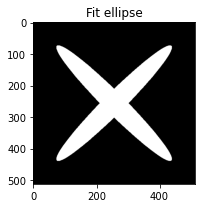

In [4]:
plt.figure(figsize=(3,3))
plt.subplot(111)
plt.axis('on')
plt.title('Fit ellipse')
plt.imshow(image, cmap='gray')
plt.tight_layout()
plt.show()

------  Original-----------------    Shape(512, 512) image: uint8
[ 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 0 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 0 0 0 ]
[ 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 0 0 ]
[ 0 0 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 255 0 0 0 0 0 ]
------  contours[0]--------------    Shape(555, 1, 2) contours[0]: int32
[ [76 74] ]
[ [74 76] ]
[ [74 84] ]
------  color--------------------    Shape(512, 512, 3) color: uint8
[ [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] [0 0 0] ]
[ [0 0 0] [0 0 0] [0 0 0] [0 0 0] [  0 255   0] [  0 255   0] [  0 255   0] [  0 255   0] ]
[ [0 0 0] [0 0 0] [0 0 0] [  0 255   0] [  0 255   0] [  0 255   0] [  0 255   0

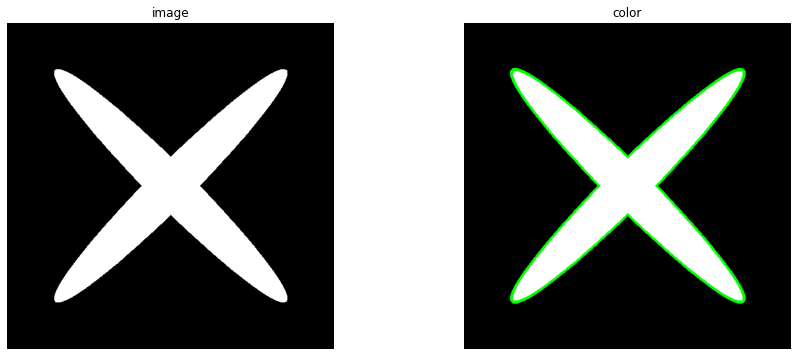

In [5]:
#https://robotclass.ru/tutorials/opencv-python-find-contours/
# Функция для отображения контуров  
#drawContours( кадр, контуры, индекс, цвет[, толщина[, тип_линии[, иерархия[, макс_слой[, сдвиг]]]]])
#  контуры — те самые контуры, найденные функцией findContours() ;
#  индекс — индекс контура, который следует отобразить. -1 — если нужно отобразить все контуры;
#  цвет — цвет контура;
#  толщина — толщина линии контура;
#  тип_линии — тип соединения точек вектора;
#              LINE_8 (or omitted) — 8-connected line.
#              LINE_4 — 4-connected line.
#              LINE_AA — antialiased line.
#  иерархия — информация об иерархии контуров;  иерархия — информация о топологии контуров. 
#             Каждый элемент иерархии представляет собой сборку из четырех индексов, которая соответствует контуру[i] ;
#  макс_слой — индекс слоя, который следует отображать. 
#              Если параметр равен 0, то будет отображен только выбранный контур. 
#              Если параметр равен 1, то отобразится выбранный контур и все его дочерние контуры. 
#              Если параметр равен 2, то отобразится выбранный контур, все его дочерние и дочерние дочерних!
#  сдвиг — величина смещения точек контура.

color = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
cv2.drawContours(color, contours, -1, (0,255,0), 3)


############################################################
print_image('Original','image',image,73,79,72,100)
print_image('contours[0]','contours[0]',contours[0],0,3,0,2)
print_image('color','color',color,71,79,72,80)

plt_view_image(plt,[["image",image],["color",color]    ])

In [6]:
for each in contours:
    print("contour.shape =",each.shape, type(each))
    for i in range (0,36):
        if i<each.shape[0]:
            print(each[i],end="")
    print()
print("hierarchy: \n",hierarchy)
#contours — список всех найденных контуров, представленных в виде векторов; 
#hierarchy — информация о топологии контуров. 
#Каждый элемент иерархии представляет собой сборку из четырех индексов, которая соответствует контуру[i]:
#hierarchy[i][0] — индекс следующего контура на текущем слое;
#hierarchy[i][1] — индекс предыдущего контура на текущем слое:
#hierarchy[i][2] — индекс первого контура на вложенном слое;
#hierarchy[i][3] — индекс родительского контура.

contour.shape = (555, 1, 2) <class 'numpy.ndarray'>
[[76 74]][[74 76]][[74 84]][[75 85]][[75 87]][[76 88]][[76 89]][[77 90]][[77 92]][[78 93]][[78 94]][[79 95]][[79 96]][[80 97]][[80 98]][[81 99]][[ 81 100]][[ 82 101]][[ 82 102]][[ 84 104]][[ 84 105]][[ 85 106]][[ 85 107]][[ 87 109]][[ 87 110]][[ 89 112]][[ 89 113]][[ 91 115]][[ 91 116]][[ 93 118]][[ 93 119]][[ 95 121]][[ 95 122]][[ 98 125]][[ 98 126]][[100 128]]
hierarchy: 
 [[[-1 -1 -1 -1]]]


In [7]:
print_image('contours[0]','contours[0]',contours[0],552,556,0,2)
print(contours[0][552:555,-1])
print( (contours[0][::-1])[:3])

------  contours[0]--------------    Shape(555, 1, 2) contours[0]: int32
[ [87 75] ]
[ [85 75] ]
[ [84 74] ]
[[87 75]
 [85 75]
 [84 74]]
[[[84 74]]

 [[85 75]]

 [[87 75]]]


In [8]:
contour = contours[0]

#Contour Area
#Contour area is given by the function cv.contourArea() or from moments, M['m00'].
#http://robocraft.ru/blog/computervision/640.html
#Свойства контуров
# OpenCV предоставляет функции для определения таких полезных свойств найденных контуров, как площадь и длина(периметр).
#  — возвращает площадь контура
#  contour — контур (последовательность или массив вершин)
#  slice — начальная и конечные точки контура (по-умолчанию весь контур)
#            
# ориентация контура влияет на знак, т.о. функция может вернуть отрицательную величину.
# Можно использовать fabs() чтобы получить абсолютное значение площади.

print('Area of contour is %.2f' % cv2.contourArea(contour))
print('Signed area of contour is %.2f' % cv2.contourArea(contour, True))
print('Signed area of contour is %.2f' % cv2.contourArea(contour[::-1], True)) #считаем с конца чтобы получить +++

Area of contour is 47474.00
Signed area of contour is -47474.00
Signed area of contour is 47474.00


In [9]:
images =[]
image_to_show = np.copy(color)
measure = True

def mouse_callback(event, x, y, flags, param):    
    global contour, image_to_show
    
    if event == cv2.EVENT_LBUTTONUP:
        
        # The function determines whether the point is: 
        # positive (inside), 
        # negative (outside), 
        # zero (on an edge)
        distance = cv2.pointPolygonTest(contour, (x,y), measure)
        # contour – Input contour.
        # pt – Point tested against the contour.
        # measureDist: 
        # true - the function estimates the signed distance from the point to the nearest contour edge. 
        # false - the return value is +1, -1, 0. Otherwise
        image_to_show = np.copy(color)
        if distance > 0: # Inside the contour
            pt_color = (0, 255, 0) # Green circle
        elif distance < 0: # Outside the contour
            pt_color = (0, 0, 255) # Red circle
        else: # On the edge
            pt_color = (128, 0, 128) # Purple circle
            
        cv2.circle(image_to_show, (x,y), 5, pt_color, -1)
        cv2.putText(image_to_show, '{0:.2f}  measure={1}'.format(distance,measure), 
                    (0, image_to_show.shape[1] - 5), 
                     cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255),
                    thickness=2 
                   )
        images.append(['{0:.2f}  measure={1}'.format(distance,measure), image_to_show])

images == 5


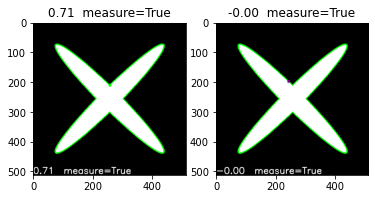

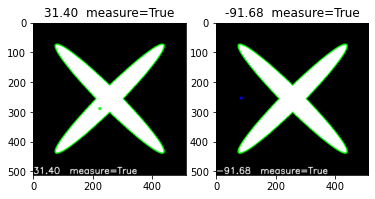

In [10]:
cv2.namedWindow('contours')
cv2.setMouseCallback('contours', mouse_callback)

while(True):
    cv2.imshow('contours', image_to_show)
    k = cv2.waitKey(1)

    if k == ord('m'):
        measure = not measure
    elif k == 27:
        break

cv2.destroyAllWindows()
print("images ==",len(images))
plt_view_image(plt,images[0:2], figsize=(6,6), axis='on', cmap='gray')
plt_view_image(plt,images[len(images)-2:len(images)+1], figsize=(6,6), axis='on', cmap='gray')

i =0 /of [5] count =0 i %2 ==0
i =1 /of [5] count =1 i %2 ==1
i =2 /of [5] count =2 i %2 ==0


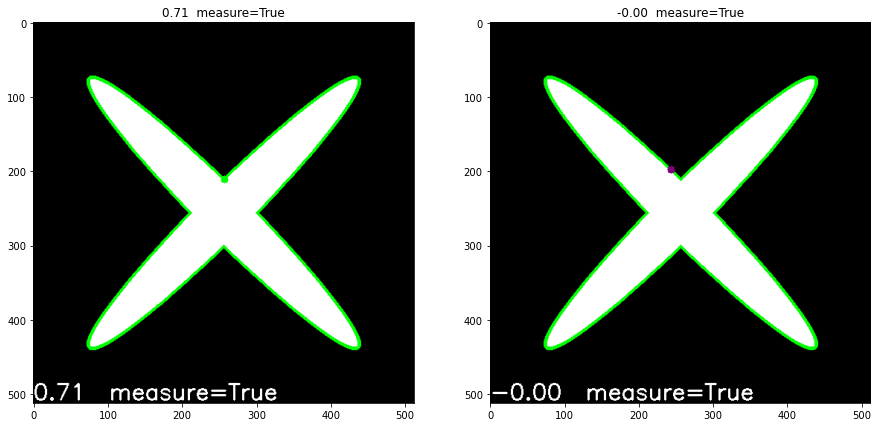

i =3 /of [5] count =1 i %2 ==1
i =4 /of [5] count =2 i %2 ==0


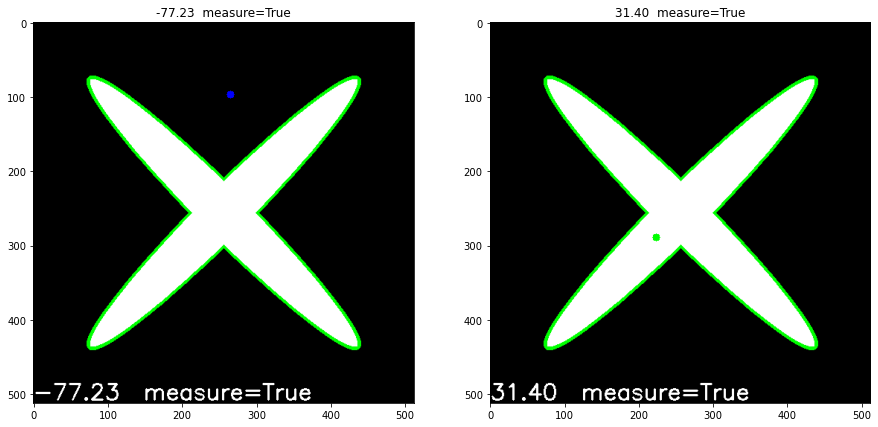

i =5 /of [5] count =1 i %2 ==1


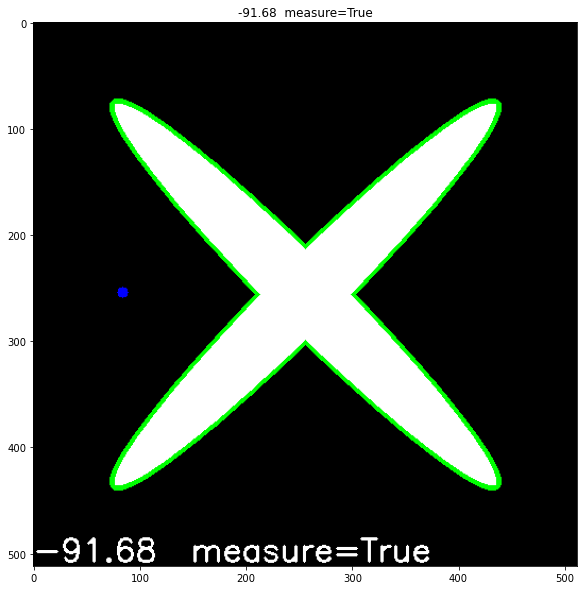

In [11]:
count = -1; i = 0
for i in range(0,len(images)+1):
    count +=1
    print("i ={0} /of [{3}] count ={1} i %2 =={2}".format(i,count,i %2,len(images)) )
    if i %2 ==0 and count>0:
        plt_view_image(plt,images[i-count:i], figsize=(15,10), axis='on', cmap='gray')
        count =0

#print("-----------------------------------\ni ={0} count ={1} i %2 =={2} {3}".format(i,count,i %2, len(images)))
if count >0:
    plt_view_image(plt,images[i-count:len(images)+1], figsize=(15,10), axis='on', cmap='gray')